In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

from sklearn.svm import SVC

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes

In [2]:
def cal_score (y_pred,y_val):
    n11 = 0
    n12 = 0
    n21 = 0
    n22 = 0
    y_pred_array= np.array(y_pred)
    y_val_array= np.array(y_val)
    for j in range(len(y_pred_array)):
        if (y_pred_array[j]==2)&(y_val_array[j]==2):
            n22 = n22+1
        elif (y_pred_array[j]==1)&(y_val_array[j]==2):
            n12 = n12 +1
        elif (y_pred_array[j]==2)&(y_val_array[j]==1):
            n21 = n21+1
        else:
            n11 = n11+1 
    try:       
        Precall = n22 / ( n12 + n22)
        Pprecision = n22 / ( n21 + n22)
        f1_score = 2 / (1/Precall + 1/Pprecision)
        FPR = n21/(n21 + n11)
        FNR = n12/(n12 +n22 )
        BER = 1/2*(FPR+FNR)
        print ("n11:.."+str(n11)+"..n12:.."+str(n12)+"..n21:.."+str(n21)+"..n22:.."+str(n22))
        print ("TPR:"+str(Precall))
        print ("f1 score:" + str(f1_score))
        print ("FPR:"+ str(FPR))
        print ("BER:" + str(BER))
        return Precall,f1_score,BER,FPR
    except Exception as ex:
        print ("divided by zero, just skip")
        return 0,0,0,0

In [3]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [6]:
def parameter_adjust (X_train,y_train):
    tpr_list = []
    fpr_list = []
    BER_list = []
    f1_score_list = []
    time_list=[]
    gamma_exp_list=[]
    C_exp_list=[]
    train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
    train = pd.DataFrame(data=train)
    Class1_sample =pd.DataFrame.sample(train[train['label']==1],1200)
    Class2_sample =pd.DataFrame.sample(train[train['label']==2],800)
    res = [Class1_sample, Class2_sample]
    train_com = pd.concat(res)
    sample_label = pd.DataFrame(train_com['label'])
    sample_feature=train_com.drop(["label"],axis=1)
    for gamma_exp in [-15,-13,-11,-9,-7,-5,-3,-1,1,3]:
        for C_exp in [-5,-3,-1,1,3,5,7,9,11,13,15]:
            start1=time.time();
            svc_clf=SVC(kernel="rbf",degree=len(sample_feature),gamma=2**gamma_exp,C=2**C_exp)
            svc_clf.fit(sample_feature,sample_label['label'])
            y_pred=svc_clf.predict(X_val)
            y_pred = {"label_pred":y_pred}
            y_pred = pd.DataFrame(data=y_pred)
            print ("curren gamma_exp:"+str(gamma_exp))
            print ("current C_exp:"+str(C_exp))
            Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
            temp=(time.time()-start1)/60
            time_list.append(temp)
            tpr_list.append(Precall)
            f1_score_list.append(f1_score)
            BER_list.append(BER)
            fpr_list.append(FPR)
            gamma_exp_list.append(gamma_exp)
            C_exp_list.append(C_exp)
            print("fit time:%5.1fminute"%(temp))
            print("            ")
    
    return tpr_list, fpr_list, BER_list, f1_score_list,time_list,gamma_exp_list,C_exp_list

In [7]:
tpr_list, fpr_list, BER_list, f1_score_list,time_list,gamma_exp_list,C_exp_list = parameter_adjust(X_train,y_train)

curren gamma_exp:-15
current C_exp:-5
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:-3
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:-1
divided by zero, just skip
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:1
n11:..61207..n12:..8719..n21:..0..n22:..101
TPR:0.01145124716553288
f1 score:0.022643201434816723
FPR:0.0
BER:0.49427437641723354
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:3
n11:..58536..n12:..5007..n21:..2671..n22:..3813
TPR:0.43231292517006803
f1 score:0.49830109775222164
FPR:0.04363879948371918
BER:0.3056629371568256
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:5
n11:..55064..n12:..3299..n21:..6143..n22:..5521
TPR:0.6259637188208617
f1 score:0.5390548720952939
FPR:0.10036433741238747
BER:0.2372003092957629
fit time:  0.0minute
            
curren gamma_exp:-15
current C_exp:7
n11:..54059..n12:..3355..n21:

curren gamma_exp:-9
current C_exp:13
n11:..54670..n12:..4375..n21:..6537..n22:..4445
TPR:0.503968253968254
f1 score:0.4489445510554489
FPR:0.10680150963125133
BER:0.3014166278314987
fit time:  0.0minute
            
curren gamma_exp:-9
current C_exp:15
n11:..53940..n12:..4257..n21:..7267..n22:..4563
TPR:0.5173469387755102
f1 score:0.4419370460048426
FPR:0.1187282500367605
BER:0.30069065563062514
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:-5
n11:..58681..n12:..5076..n21:..2526..n22:..3744
TPR:0.42448979591836733
f1 score:0.49622266401590454
FPR:0.04126978940317284
BER:0.30838999674240275
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:-3
n11:..54895..n12:..3170..n21:..6312..n22:..5650
TPR:0.6405895691609977
f1 score:0.5437397748051198
FPR:0.10312545950626563
BER:0.23126794517263394
fit time:  0.0minute
            
curren gamma_exp:-7
current C_exp:-1
n11:..53904..n12:..3255..n21:..7303..n22:..5565
TPR:0.6309523809523809
f1 score:0.5131870158

curren gamma_exp:-1
current C_exp:1
n11:..51747..n12:..3059..n21:..9460..n22:..5761
TPR:0.6531746031746032
f1 score:0.479264589659332
FPR:0.1545574852549545
BER:0.25069144104017566
fit time:  0.0minute
            
curren gamma_exp:-1
current C_exp:3
n11:..51068..n12:..2934..n21:..10139..n22:..5886
TPR:0.6673469387755102
f1 score:0.4738176695512175
FPR:0.16565098763213357
BER:0.2491520244283117
fit time:  0.0minute
            
curren gamma_exp:-1
current C_exp:5
n11:..49723..n12:..3059..n21:..11484..n22:..5761
TPR:0.6531746031746032
f1 score:0.44204872434298875
FPR:0.18762559837927034
BER:0.2672254976023336
fit time:  0.0minute
            
curren gamma_exp:-1
current C_exp:7
n11:..48972..n12:..3160..n21:..12235..n22:..5660
TPR:0.6417233560090703
f1 score:0.4237319857757814
FPR:0.19989543679644486
BER:0.2790860403936873
fit time:  0.0minute
            
curren gamma_exp:-1
current C_exp:9
n11:..49823..n12:..3181..n21:..11384..n22:..5639
TPR:0.6393424036281179
f1 score:0.43640444220872

In [8]:
SVC_parameter_adjustment={"tpr":tpr_list,"fpr":fpr_list,"BER":BER_list,"f1_score":f1_score_list,"gamma_exp":gamma_exp_list,"C_exp":C_exp_list,"time_list":time_list}
SVC_parameter_adjustment=pd.DataFrame(data=SVC_parameter_adjustment)

In [9]:
SVC_parameter_adjustment

,BER,C_exp,f1_score,fpr,gamma_exp,time_list,tpr
0,0.000000,-5,0.000000,0.000000,-15,0.044516,0.000000
1,0.000000,-3,0.000000,0.000000,-15,0.044746,0.000000
2,0.000000,-1,0.000000,0.000000,-15,0.047033,0.000000
3,0.494274,1,0.022643,0.000000,-15,0.044359,0.011451
4,0.305663,3,0.498301,0.043639,-15,0.044755,0.432313
5,0.237200,5,0.539055,0.100364,-15,0.037784,0.625964
6,0.248585,7,0.509961,0.116784,-15,0.033180,0.619615
7,0.249747,9,0.498698,0.128972,-15,0.031987,0.629478
8,0.255388,11,0.491230,0.129936,-15,0.031400,0.619161
9,0.258833,13,0.486440,0.130818,-15,0.031391,0.613152


In [11]:
SVC_parameter_adjustment.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\SVC_parameter_adjustment_unbiased_data.csv",index=True)

In [10]:
max(f1_score_list)

0.550695730635893

In [22]:
X,Y = np.meshgrid([-5,-3,-1,1,3,5,7,9,11,13,15],[-15,-13,-11,-9,-7,-5,-3,-1,1,3])

In [27]:
Height = np.array(f1_score_list).reshape(10,11)

In [28]:
f1_score_list

[0,
 0,
 0,
 0.022643201434816723,
 0.49830109775222164,
 0.5390548720952939,
 0.5099612746699016,
 0.4986975657953831,
 0.49122964828640825,
 0.48644029682932316,
 0.474959172563963,
 0,
 0,
 0.021534320323014805,
 0.4984321923177424,
 0.5390472471690746,
 0.5101955111754001,
 0.4986742168891286,
 0.4874904205923455,
 0.47919487318350035,
 0.4724330712240353,
 0.47122386657270376,
 0,
 0.017754803910551748,
 0.49830109775222164,
 0.5392754400507095,
 0.5106422703510082,
 0.49399440079472595,
 0.4807041299932295,
 0.47362931386331686,
 0.47009148486981,
 0.442230869001297,
 0.43194343350317144,
 0,
 0.5019100032372936,
 0.5399698340874811,
 0.512537147102526,
 0.4832703600855829,
 0.47708992318120197,
 0.47552316890881907,
 0.4499896885955867,
 0.43940795559666973,
 0.4489445510554489,
 0.4419370460048426,
 0.49622266401590454,
 0.5437397748051198,
 0.5131870158613058,
 0.49844657571254897,
 0.49207373271889404,
 0.462182728154844,
 0.4492898579715943,
 0.4439587589680239,
 0.434613470

In [29]:
Height

array([[ 0.        ,  0.        ,  0.        ,  0.0226432 ,  0.4983011 ,
         0.53905487,  0.50996127,  0.49869757,  0.49122965,  0.4864403 ,
         0.47495917],
       [ 0.        ,  0.        ,  0.02153432,  0.49843219,  0.53904725,
         0.51019551,  0.49867422,  0.48749042,  0.47919487,  0.47243307,
         0.47122387],
       [ 0.        ,  0.0177548 ,  0.4983011 ,  0.53927544,  0.51064227,
         0.4939944 ,  0.48070413,  0.47362931,  0.47009148,  0.44223087,
         0.43194343],
       [ 0.        ,  0.50191   ,  0.53996983,  0.51253715,  0.48327036,
         0.47708992,  0.47552317,  0.44998969,  0.43940796,  0.44894455,
         0.44193705],
       [ 0.49622266,  0.54373977,  0.51318702,  0.49844658,  0.49207373,
         0.46218273,  0.44928986,  0.44395876,  0.43461347,  0.41210424,
         0.40679829],
       [ 0.55069573,  0.53045434,  0.51416894,  0.48969198,  0.46897942,
         0.45245749,  0.4382297 ,  0.44249566,  0.46363431,  0.47473646,
         0.495

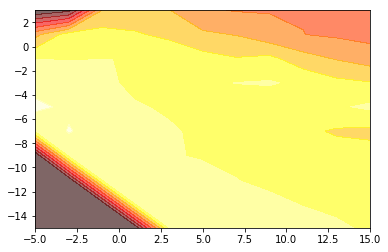

In [30]:
plt.contourf(X, Y, Height, 10, alpha = 0.6, cmap = plt.cm.hot)

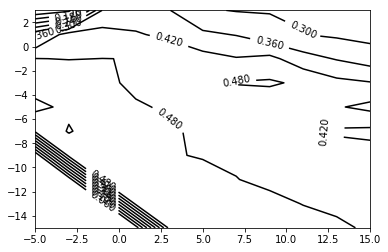

In [31]:
C = plt.contour(X, Y, Height, 10, colors = 'black', linewidth = 0.5)
plt.clabel(C, inline = True, fontsize = 10)
plt.show()